# Image Captioning - Data Exploration

This notebook explores the Flickr8k dataset for the image captioning task. We will:

1. Download and prepare the dataset
2. Explore the images and captions
3. Analyze the distribution of caption lengths
4. Examine the vocabulary
5. Visualize some sample images with their captions

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nltk
from collections import Counter
from tqdm import tqdm
import re
import string
import seaborn as sns

# Add project root to path
sys.path.append('..')

# Import project modules
from data.download_flickr import download_flickr8k, process_captions
from utils.vocabulary import Vocabulary, build_vocab_from_captions

## 1. Download and Prepare the Dataset

In [2]:
# Download and prepare the Flickr8k dataset
data_dir = '../data'
paths = download_flickr8k(data_dir)

File already exists at ../data\flickr8k\Flickr8k_Dataset.zip. Skipping download.
File already exists at ../data\flickr8k\Flickr8k_text.zip. Skipping download.


Extracting Flickr8k_text.zip: 100%|██████████| 10/10 [00:00<00:00, 277.17it/s]


[INFO] Using captions file at: ../data\flickr8k\Flickr8k.token.txt
[DEBUG] Opened file: ../data\flickr8k\Flickr8k.token.txt
[DEBUG] First 5 lines of the file:
'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .\n'
'1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .\n'
'1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .\n'
'1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .\n'
'1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .\n'
[DEBUG LINE 0]: '1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .'
[DEBUG] Total processed captions: 40460
[DEBUG] DataFrame preview:
                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                         

Organizing images: 100%|██████████| 8091/8091 [00:00<00:00, 21568.53it/s]


Images organized in ../data\flickr8k\processed\images
Created data splits: train (30000 captions), val (5000 captions), test (5000 captions)


## 2. Explore the Images and Captions

In [4]:
file_path = r'..\data\flickr8k\processed\captions.csv'
df = pd.read_csv(file_path)
print(df.head())

                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  


In [5]:
# Count unique images and total captions
captions_df = df.copy()
unique_images = captions_df['image'].nunique()
total_captions = len(captions_df)

print(f"Total number of images: {unique_images}")
print(f"Total number of captions: {total_captions}")
print(f"Average captions per image: {total_captions / unique_images:.2f}")

Total number of images: 8092
Total number of captions: 40460
Average captions per image: 5.00


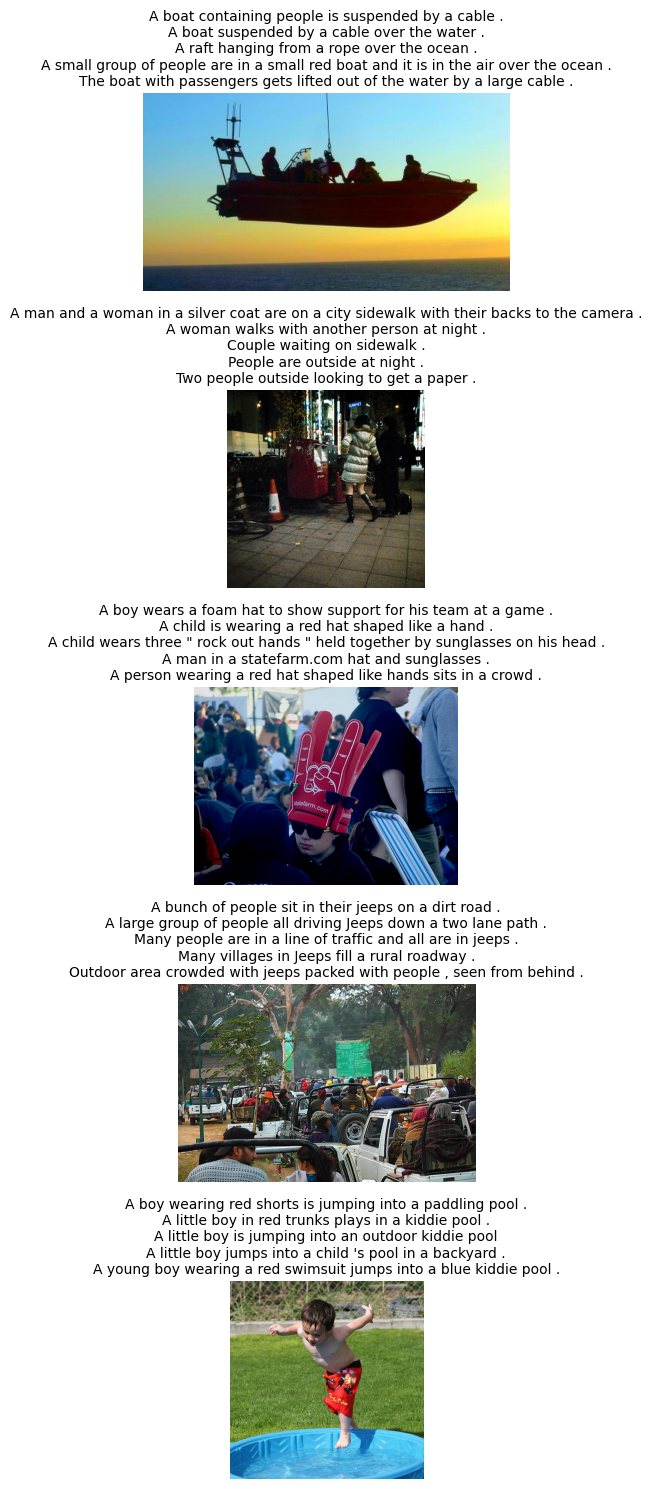

In [6]:
# Display a random sample of images with their captions
# ✅TODO: Implement the function to display images with their captions
# This function should:
# 1. Take a DataFrame of captions, path to images directory, and number of samples
# 2. Get random image samples
# 3. Create a figure with subplots
# 4. For each image:
#    a. Load and display the image
#    b. Find all captions for that image
#    c. Add captions as a formatted title
def display_images_with_captions(captions_df, images_dir, num_samples=5):
    # Get unique images
    unique_image_df = captions_df.drop_duplicates(subset=['image'])
    
    # Your implementation here
     # 2. Get random image samples
    sampled_images = unique_image_df.sample(n=num_samples)

    # 3. Create a figure with subplots
    plt.figure(figsize=(15, num_samples * 3))
    # 4. For each image:
    for i, row in enumerate(sampled_images.itertuples()):
        image_name = row.image
        image_path = os.path.join(images_dir, image_name)

        # 4a. Load and display the image
        try:
            image = Image.open(image_path)
        except Exception as e:
            print(f"[ERROR] Couldn't open image {image_name}: {e}")
            continue

        # 4b. Find all captions for that image
        captions = captions_df[captions_df['image'] == image_name]['caption'].tolist()
        caption_text = '\n'.join(captions)

        # 4c. Add captions as a formatted title
        plt.subplot(num_samples, 1, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(caption_text, fontsize=10)

    plt.tight_layout()
    plt.show()
# Display some sample images with their captions
images_dir = os.path.join(paths['processed_path'], 'images')
display_images_with_captions(captions_df, images_dir)

## 3. Analyze Caption Lengths

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hivaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Tokenize captions
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

In [8]:

tokenizer = TreebankWordTokenizer()
text = "Hello, world! This is a test sentence."
tokens = tokenizer.tokenize(text)
print(tokens)


['Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', 'sentence', '.']


In [10]:
captions_df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40455,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40456,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40457,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40458,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [11]:
# ✅TODO: Implement the tokenize function for caption text
# This function should:
# 1. Convert text to lowercase
# 2. Remove punctuation using regex
# 3. Split text into tokens using NLTK's word_tokenize
# 4. Return the list of tokens
tokenizer = TreebankWordTokenizer()
def tokenize(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)

    # 3. Tokenize using NLTK's word_tokenize
    tokens = tokenizer.tokenize(text)
    # 4. Return the list of tokens
    return tokens


# Calculate caption lengths
captions_df['tokens'] = captions_df['caption'].apply(tokenize)
captions_df['length'] = captions_df['tokens'].apply(len)

# Display statistics
caption_lengths = captions_df['length']
print(f"Min length: {caption_lengths.min()}")
print(f"Max length: {caption_lengths.max()}")
print(f"Mean length: {caption_lengths.mean():.2f}")
print(f"Median length: {caption_lengths.median()}")
print(f"90th percentile length: {caption_lengths.quantile(0.9)}")
print(f"95th percentile length: {caption_lengths.quantile(0.95)}")

Min length: 1
Max length: 36
Mean length: 10.79
Median length: 10.0
90th percentile length: 16.0
95th percentile length: 18.0


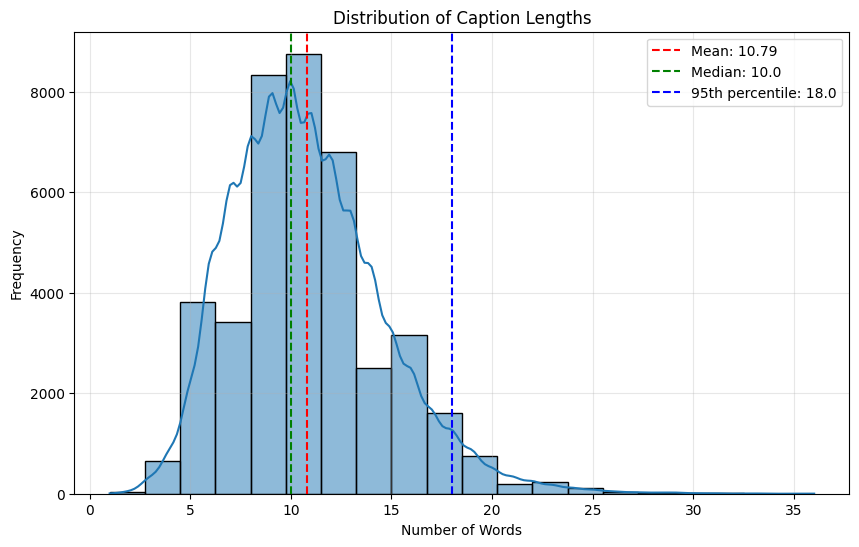

In [38]:
# Plot the distribution of caption lengths
# 1. Histogram + KDE: Show overall distribution, mean, median, and 95th percentile
plt.figure(figsize=(10, 6))
sns.histplot(caption_lengths, bins=20, kde=True)
plt.axvline(x=caption_lengths.mean(), color='r', linestyle='--', label=f'Mean: {caption_lengths.mean():.2f}')
plt.axvline(x=caption_lengths.median(), color='g', linestyle='--', label=f'Median: {caption_lengths.median()}')
plt.axvline(x=caption_lengths.quantile(0.95), color='b', linestyle='--', label=f'95th percentile: {caption_lengths.quantile(0.95)}')
plt.title('Distribution of Caption Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
captions_df

,image,caption,tokens,length
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[a, child, in, a, pink, dress, is, climbing, u...",17
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[a, girl, going, into, a, wooden, building]",7
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,"[a, little, girl, climbing, into, a, wooden, p...",8
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,"[a, little, girl, climbing, the, stairs, to, h...",9
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,"[a, little, girl, in, a, pink, dress, going, i...",12
...,...,...,...,...
40455,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face,"[a, man, in, a, pink, shirt, climbs, a, rock, ...",10
40456,997722733_0cb5439472.jpg,A man is rock climbing high in the air .,"[a, man, is, rock, climbing, high, in, the, air]",9
40457,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...,"[a, person, in, a, red, shirt, climbing, up, a...",15
40458,997722733_0cb5439472.jpg,A rock climber in a red shirt .,"[a, rock, climber, in, a, red, shirt]",7


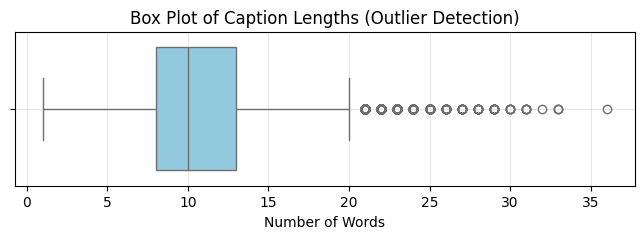

In [39]:
# 2. Box Plot: Detect outliers and observe quartile ranges
# -----------------------------------------------
plt.figure(figsize=(8, 2))
sns.boxplot(x=caption_lengths, color='skyblue')
plt.title('Box Plot of Caption Lengths (Outlier Detection)')
plt.xlabel('Number of Words')
plt.grid(True, alpha=0.3)
plt.show()

In [42]:
import scipy.stats as stats

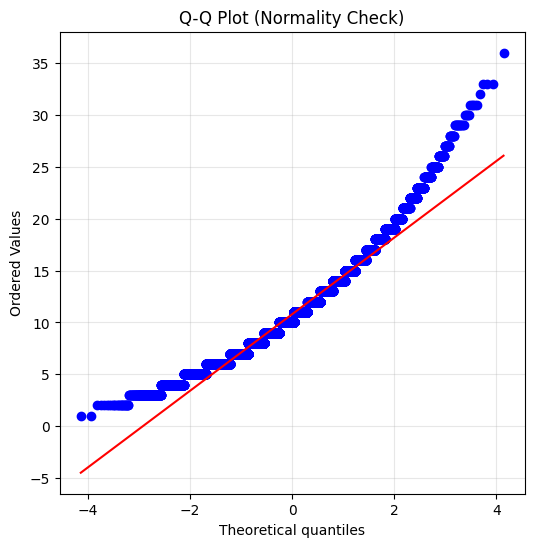

In [43]:
# 3. Q-Q Plot: Check if the distribution is close to normal
# -----------------------------------------------
plt.figure(figsize=(6, 6))
stats.probplot(caption_lengths, dist="norm", plot=plt)
plt.title("Q-Q Plot (Normality Check)")
plt.grid(True, alpha=0.3)
plt.show()

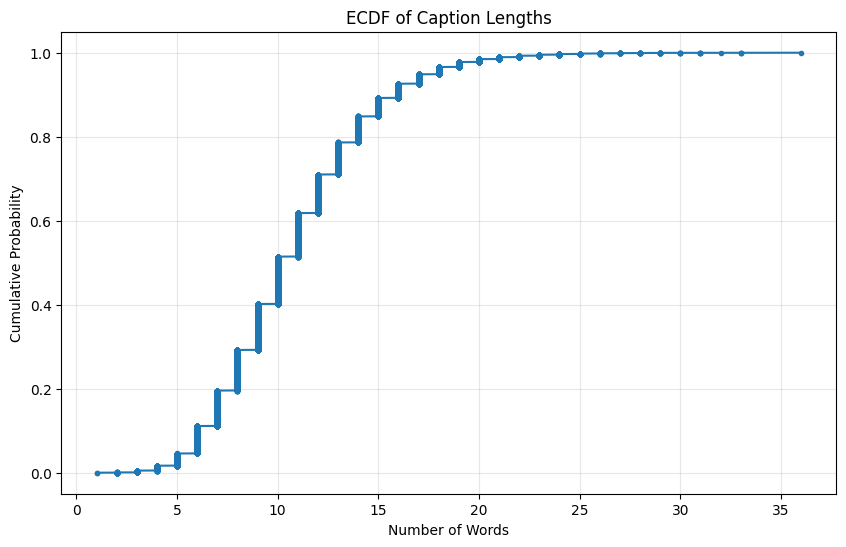

In [48]:
# -----------------------------------------------
# ECDF without statsmodels: Show cumulative distribution using NumPy only
# -----------------------------------------------
caption_lengths_sorted = np.sort(caption_lengths)
n = len(caption_lengths_sorted)
y = np.arange(1, n + 1) / n  # cumulative probability

plt.figure(figsize=(10, 6))
plt.plot(caption_lengths_sorted, y, marker='.', linestyle='-')
plt.title('ECDF of Caption Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)
plt.show()

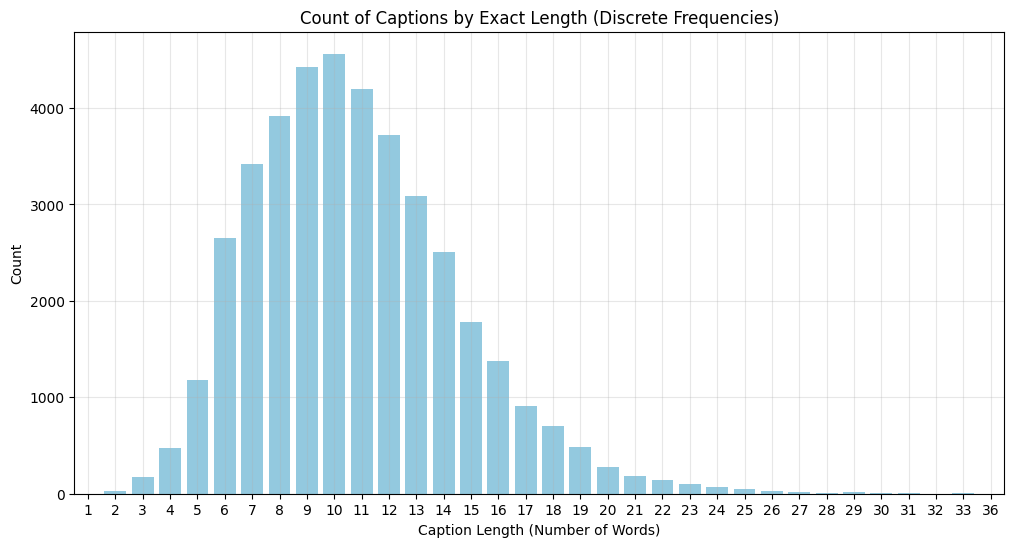

In [46]:
# 5. Count Plot: Show exact frequency of each caption length (discrete counts)
# -----------------------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(x=caption_lengths, color='skyblue')
plt.title('Count of Captions by Exact Length (Discrete Frequencies)')
plt.xlabel('Caption Length (Number of Words)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Examine the Vocabulary

In [13]:
# Count word frequencies
all_tokens = [token for tokens in captions_df['tokens'] for token in tokens]
word_freq = Counter(all_tokens)

# Display statistics
print(f"Total vocabulary size: {len(word_freq)}")
print(f"Number of words appearing only once: {sum(1 for count in word_freq.values() if count == 1)}")

Total vocabulary size: 8827
Number of words appearing only once: 3608


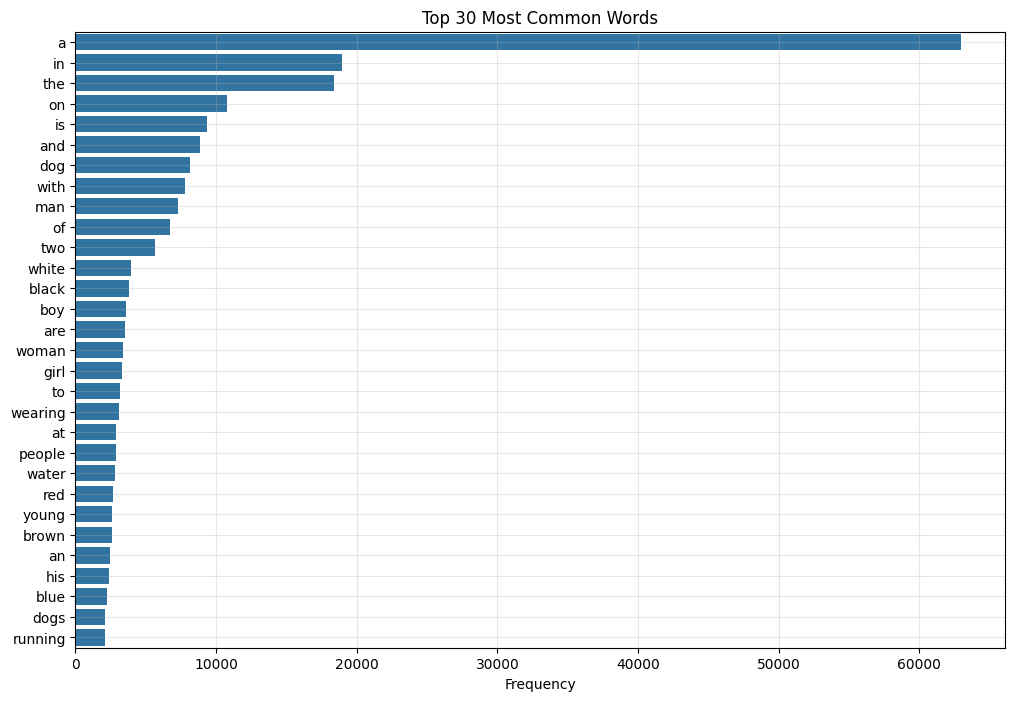

In [50]:
# Plot the most common words
top_n = 30
most_common = word_freq.most_common(top_n)
words, counts = zip(*most_common)

plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words))
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# Calculate vocabulary coverage with different frequency thresholds
# ✅TODO: Calculate vocabulary coverage for different word frequency thresholds
# For each threshold:
# 1. Find words that appear at least 'threshold' times
# 2. Calculate vocabulary size (number of unique words above threshold)
# 3. Calculate what percentage of all tokens are covered by this vocabulary
# 4. Store results for plotting
thresholds = [1, 2, 3, 5, 10]
coverage = []
total_tokens = sum(word_freq.values())

for threshold in thresholds:
    # 1. Select words with frequency >= threshold
    filtered_words = {word: freq for word, freq in word_freq.items() if freq >= threshold}
    
    # 2. Calculate the size of the filtered vocabulary
    vocab_size = len(filtered_words)
    
    # 3. Calculate how many tokens are covered by the filtered vocabulary
    covered_tokens = sum(filtered_words.values())
    coverage_pct = 100 * covered_tokens / total_tokens
    
    # 4. Store results
    coverage.append((threshold, vocab_size, coverage_pct))
    
    print(f"Threshold: {threshold}, Vocabulary size: {vocab_size}, Coverage: {coverage_pct:.2f}%")

Threshold: 1, Vocabulary size: 8827, Coverage: 100.00%
Threshold: 2, Vocabulary size: 5219, Coverage: 99.17%
Threshold: 3, Vocabulary size: 4093, Coverage: 98.66%
Threshold: 5, Vocabulary size: 2991, Coverage: 97.80%
Threshold: 10, Vocabulary size: 1955, Coverage: 96.24%


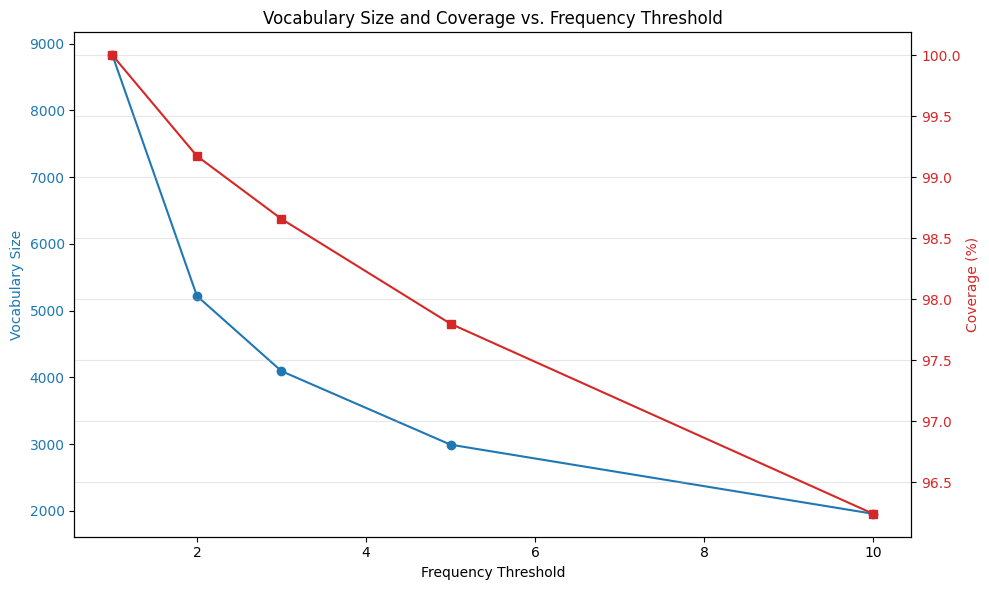

In [15]:
# Plot vocabulary coverage
thresholds, vocab_sizes, coverages = zip(*coverage)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot vocabulary size
color = 'tab:blue'
ax1.set_xlabel('Frequency Threshold')
ax1.set_ylabel('Vocabulary Size', color=color)
ax1.plot(thresholds, vocab_sizes, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for coverage
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Coverage (%)', color=color)
ax2.plot(thresholds, coverages, 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Vocabulary Size and Coverage vs. Frequency Threshold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Build and Save the Vocabulary

In [15]:
import nltk
import os
import shutil

# 1. Remove any corrupted NLTK data
nltk_dir = os.path.join(os.path.expanduser("~"), "nltk_data")
if os.path.exists(nltk_dir):
    shutil.rmtree(nltk_dir)

# 2. Force fresh download to a known location
custom_nltk_dir = r"C:\nltk_data"  # Using root directory for maximum permissions
os.makedirs(custom_nltk_dir, exist_ok=True)
nltk.data.path = [custom_nltk_dir]  # OVERRIDE all other paths

# 3. Download with verbose output
print("DOWNLOADING PUNKT TOKENIZER...")
nltk.download('punkt', download_dir=custom_nltk_dir, quiet=False)

# 4. Verify installation
try:
    nltk.data.find('tokenizers/punkt')
    print("✓ PUNKT SUCCESSFULLY INSTALLED AT:", os.path.join(custom_nltk_dir, "tokenizers", "punkt"))
except LookupError as e:
    print("❌ FAILED! Manual steps required:")
    print("1. Download manually from https://www.nltk.org/nltk_data/")
    print("2. Extract to:", custom_nltk_dir)
    raise e

DOWNLOADING PUNKT TOKENIZER...


[nltk_data] Downloading package punkt to C:\nltk_data...


✓ PUNKT SUCCESSFULLY INSTALLED AT: C:\nltk_data\tokenizers\punkt


[nltk_data]   Unzipping tokenizers\punkt.zip.


In [14]:
from nltk.tokenize.punkt import PunktSentenceTokenizer


In [15]:
# Example text
text = "Hello there! How are you doing today? This is a test of the Punkt tokenizer."

# Initialize tokenizer
tokenizer = PunktSentenceTokenizer()

# Tokenize into sentences
sentences = tokenizer.tokenize(text)

# Print result
for i, sentence in enumerate(sentences):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: Hello there!
Sentence 2: How are you doing today?
Sentence 3: This is a test of the Punkt tokenizer.


In [19]:
print(nltk.data.path)

['C:\\nltk_data']


In [16]:
# Build and save the vocabulary
freq_threshold = 5  # Words appearing less than 5 times are considered rare
vocab = build_vocab_from_captions(paths['captions_path'], paths['processed_path'], freq_threshold=freq_threshold)

print(f"Built vocabulary with {len(vocab)} words")

Loading captions from ../data\flickr8k\processed\captions.csv
Building vocabulary from 40460 captions


Building vocabulary: 100%|██████████| 41/41 [00:00<00:00, 94.63it/s] 

Vocabulary built with 2970 words
Saved to ../data\flickr8k\processed\vocabulary.pkl
Built vocabulary with 2970 words


In [17]:
import pickle

# Load the vocabulary
with open(paths['processed_path'] + '/vocabulary.pkl', 'rb') as f:
    vocab = pickle.load(f)

print(type(vocab))   #<class 'Vocabulary'>


print(f"Vocabulary size: {len(vocab)}")

<class 'utils.vocabulary.Vocabulary'>
Vocabulary size: 2970


## 6. Explore Data Splits

In [18]:
# Load data splits
train_df = pd.read_csv(os.path.join(paths['processed_path'], 'train_captions.csv'))
val_df = pd.read_csv(os.path.join(paths['processed_path'], 'val_captions.csv'))
test_df = pd.read_csv(os.path.join(paths['processed_path'], 'test_captions.csv'))

# Display statistics
print(f"Training set: {train_df['image'].nunique()} images, {len(train_df)} captions")
print(f"Validation set: {val_df['image'].nunique()} images, {len(val_df)} captions")
print(f"Test set: {test_df['image'].nunique()} images, {len(test_df)} captions")

Training set: 6000 images, 30000 captions
Validation set: 1000 images, 5000 captions
Test set: 1000 images, 5000 captions


## 7. Check Image Dimensions

In [60]:
import random

In [65]:
# Check image dimensions for a sample of images
# ✅TODO: Implement a function to analyze image dimensions in the dataset
# This function should:
# 1. Get a sample of image files from the directory
# 2. Load each image and extract its dimensions
# 3. Return a DataFrame with width and height columns for analysis
def check_image_dimensions(images_dir, num_samples=100):
    # 1. Get all image file paths in the directory
    image_files = [os.path.join(images_dir, fname) for fname in os.listdir(images_dir)
                   if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Take a sample of image files
    sampled_files = random.sample(image_files, min(num_samples, len(image_files)))

    # 2. Store dimensions
    dimensions = []
    for img_path in sampled_files:
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                dimensions.append({'filename': os.path.basename(img_path), 'width': width, 'height': height})
        except Exception as e:
            print(f"Error reading image {img_path}: {e}")

    # 3. Convert to DataFrame
    dim_df = pd.DataFrame(dimensions)
    return dim_df

# Check dimensions
images_dir = '../data/flickr8k/Flicker8k_Dataset'
image_dimensions = check_image_dimensions(images_dir)

# Display statistics
print("Image dimension statistics:")
print(image_dimensions.describe())

Image dimension statistics:
            width      height
count  100.000000  100.000000
mean   462.920000  392.720000
std     65.684382   73.409338
min    331.000000  229.000000
25%    474.000000  333.000000
50%    500.000000  375.000000
75%    500.000000  500.000000
max    500.000000  500.000000


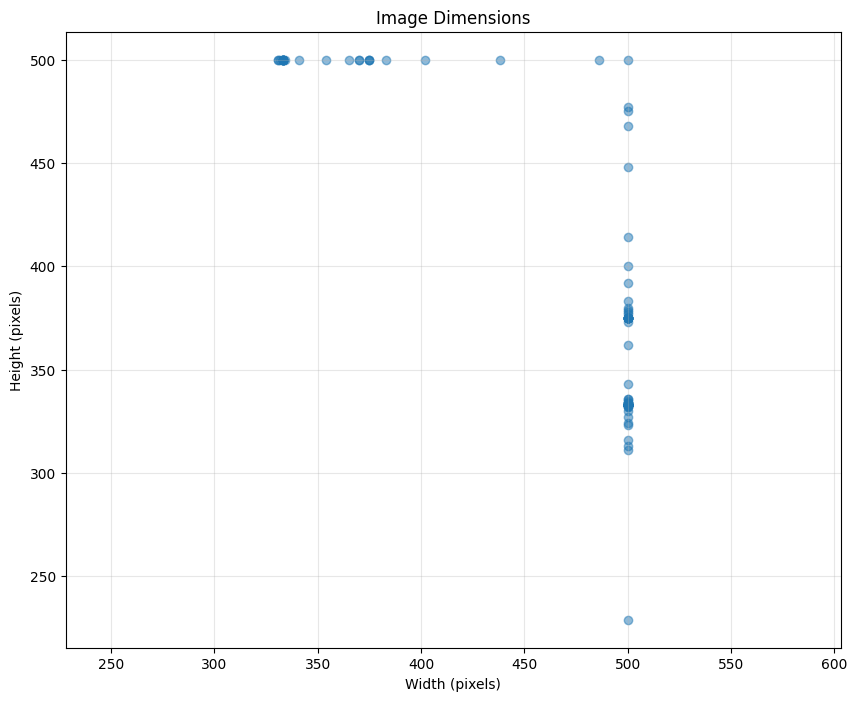

In [66]:
# Plot image dimensions
plt.figure(figsize=(10, 8))
plt.scatter(image_dimensions['width'], image_dimensions['height'], alpha=0.5)
plt.title('Image Dimensions')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

## Summary

In this notebook, we have explored the Flickr8k dataset for image captioning. We have:

1. Downloaded and prepared the dataset
2. Explored the images and captions
3. Analyzed the distribution of caption lengths
4. Examined the vocabulary and its coverage
5. Built and saved the vocabulary
6. Explored the data splits
7. Checked image dimensions

This exploration gives us a good understanding of the dataset and helps us make informed decisions when designing our image captioning model.